In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
affaldsdata = pd.read_csv('affaldskurve_puma.csv', sep=',')
affaldsdata

,FID,id,status,driftsplan_navn,arbejdssted_navn,arbejdssted_id,tekst_id,driftsbydel,byrumstype,underordnet_byrumstype,...,toemningsansvarlig_navn,driftsansvarlig,toemningsfrekvens_lavsaeson,toemningsfrekvens_hoejsaeson,type,har_sensor,kommentar,oprettet,pantholder,wkb_geometry
0,affaldskurve_puma.1,1,IDrift,Bydækkende drift,NaN,NaN,NaN,Vesterbro-Kgs.Enghave,Gader og pladser,Gade med grønt,...,TMF,NaN,NaN,NaN,Københavnerkurven,False,NaN,2018-08-27T13:59:17.06,True,MULTIPOINT ((12.527441463593396 55.65170085925...
1,affaldskurve_puma.2,2,IDrift,Bydækkende drift,NaN,NaN,NaN,Amager Vest,Gader og pladser,Gade med grønt,...,NaN,NaN,F (4 ugentlige tømninger fordelt på 3 hverdage...,F (4 ugentlige tømninger fordelt på 3 hverdage...,Pizzakurv 2020,False,NaN,2022-06-24T05:55:56.401,False,MULTIPOINT ((12.596081615244765 55.66513573263...
2,affaldskurve_puma.3,3,IDrift,Bydækkende drift,NaN,NaN,NaN,Indre By,Gader og pladser,Gade med grønt,...,TMF,NaN,D (2 daglige tømninger ugens 7 dage),D (2 daglige tømninger ugens 7 dage),Pizzakurv 2020,True,NaN,2020-10-01T07:53:15.503,False,MULTIPOINT ((12.56631893572696 55.675387959930...
3,affaldskurve_puma.4,4,IDrift,Bydækkende drift,NaN,NaN,NaN,Valby,Småarealer,Øvrigt småareal,...,TMF,NaN,E (1 daglig tømning ugens 7 dage),E (1 daglig tømning ugens 7 dage),Richard Møller,False,NaN,2018-08-27T13:57:37.213,True,MULTIPOINT ((12.527123370014904 55.65190409945...
4,affaldskurve_puma.6,6,IDrift,Bydækkende drift,NaN,NaN,NaN,Indre By,Gader og pladser,Gade med grønt,...,TMF,NaN,D (2 daglige tømninger ugens 7 dage),D (2 daglige tømninger ugens 7 dage),Pizzakurv 2020,True,NaN,2020-11-23T10:07:39.472,False,MULTIPOINT ((12.566423507453456 55.67542573086...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,affaldskurve_puma.8905,8905,IDrift,Bydækkende drift,NaN,NaN,NaN,Valby,Gader og pladser,Gade med grønt,...,TMF,Grå renhold,E (1 daglig tømning ugens 7 dage),E (1 daglig tømning ugens 7 dage),Richard Møller,False,NaN,2018-08-27T13:58:43.998,True,MULTIPOINT ((12.498009592565909 55.65970858058...
4842,affaldskurve_puma.8906,8906,IDrift,Bydækkende drift,NaN,NaN,NaN,Vesterbro-Kgs.Enghave (udl.),Gader og pladser,Grøn plads,...,Terranor,NaN,F (4 ugentlige tømninger fordelt på 3 hverdage...,E (1 daglig tømning ugens 7 dage),Pizzakurv 2020,False,NaN,2025-01-08T10:50:21.381,False,MULTIPOINT ((12.556123097673852 55.65366982062...
4843,affaldskurve_puma.8907,8907,IDrift,Bydækkende drift,NaN,NaN,NaN,Vesterbro-Kgs.Enghave (udl.),Gader og pladser,Grøn plads,...,Terranor,NaN,F (4 ugentlige tømninger fordelt på 3 hverdage...,E (1 daglig tømning ugens 7 dage),Pizzakurv 2020,False,NaN,2025-01-08T12:56:12.779,False,MULTIPOINT ((12.557196031072381 55.65463899036...
4844,affaldskurve_puma.8908,8908,IDrift,Småparker Indre By_Christianshavn,Israels Plads,1871.0,Småpa_Israe_1871,Indre By,Gader og pladser,Grøn plads,...,TMF,NaN,E (1 daglig tømning ugens 7 dage),C (3 daglige tømninger ugens 7 dage),Pizzakurv 2020,True,NaN,2020-11-09T07:56:40.293,False,MULTIPOINT ((12.567685234259233 55.68256970506...


In [7]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import re

# Load your dataset (assuming it's a CSV file)
df = pd.read_csv('affaldskurve_puma.csv', sep=',')

# Function to extract latitude and longitude
def extract_coordinates(wkb_geometry):
    match = re.search(r"MULTIPOINT \(\(([\d\.\-]+) ([\d\.\-]+)\)\)", wkb_geometry)
    if match:
        lon, lat = map(float, match.groups())  # Convert strings to floats
        return lat, lon
    return None  # Handle cases where format is unexpected

# Apply function to extract coordinates
df["coordinates"] = df["wkb_geometry"].apply(lambda x: extract_coordinates(str(x)))

# Drop rows where coordinates could not be extracted
df = df.dropna(subset=["coordinates"])

# Create separate latitude and longitude columns
df["latitude"] = df["coordinates"].apply(lambda x: x[0])
df["longitude"] = df["coordinates"].apply(lambda x: x[1])

# Convert to a list of (lat, lon) for HeatMap
heatmap_data = df[["latitude", "longitude"]].values.tolist()
# Initialize a map centered on Copenhagen
m = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add the heatmap layer
HeatMap(heatmap_data).add_to(m)

# Save and display the map
m.save("copenhagen_heatmap.html")
m  # If using Jupyter Notebook


In [5]:
trafikdata = pd.read_csv('trafiktaelling_fodg.csv', sep=',')
trafikdata

,FID,t_nr,vejnavn,beskrivelse,husnummer,type,taelling_type,fod_7_19,aadt_fod_7_19,hvdt_fod_7_19,...,fod_7_24,aadt_fod_7_24,hvdt_fod_7_24,aadt_fod_label,fod_gns_10_18,taelle_dato,aar,link,ogc_fid,wkb_geometry
0,trafiktaelling_fodg.1,9,Farvergade,nordøst for Rådhuspladsen,6,3,Andre faste tællinger,2711.0,3200.0,3300.0,...,NaN,NaN,NaN,3200.0,NaN,20230613,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/A...,1,POINT (12.572626735624134 55.6759965258084)
1,trafiktaelling_fodg.2,11,Frederiksborggade,øst for Nørre Voldgade,10,3,Andre faste tællinger,30883.0,36100.0,37400.0,...,NaN,NaN,NaN,36100.0,NaN,20230608,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/j...,2,POINT (12.572966838603646 55.68308816561314)
2,trafiktaelling_fodg.3,17,Gothersgade,sydøst for Søtorvet,160 eller 175,3,Andre faste tællinger,1346.0,1600.0,1600.0,...,NaN,NaN,NaN,1600.0,126.0,20130910,2013,http://kk.sites.itera.dk/apps/kk_trafik/pdf/m8...,3,POINT (12.566545050457883 55.68641228608008)
3,trafiktaelling_fodg.4,33,Nørregade,sydøst for Nørre Voldgade,49,3,Andre faste tællinger,10078.0,11800.0,12200.0,...,NaN,NaN,NaN,11800.0,909.0,20140904,2014,http://kk.sites.itera.dk/apps/kk_trafik/pdf/7y...,4,POINT (12.570985593756626 55.68210595859012)
4,trafiktaelling_fodg.5,113,Frederiksberggade,nordøst for Rådhuspladsen,27 eller 38,3,Andre faste tællinger,26039.0,30500.0,31500.0,...,NaN,NaN,NaN,30500.0,NaN,20230613,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/N...,5,POINT (12.569758490421108 55.676649880742794)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,trafiktaelling_fodg.397,10285,Ved Stranden,vest for Holmens Kanal,2,100,Øvrige tællinger,2833.0,3300.0,3400.0,...,NaN,NaN,NaN,3300.0,NaN,20230912,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/q...,397,POINT (12.58233854540193 55.6768780790445)
397,trafiktaelling_fodg.398,10286,Vestergade,FOD,37,100,Øvrige tællinger,7043.0,8200.0,8500.0,...,NaN,NaN,NaN,8200.0,NaN,20230613,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/S...,398,POINT (12.568829846992298 55.67683210591664)
398,trafiktaelling_fodg.399,10293,Nygårdsvej,TRAFIK,65,100,Øvrige tællinger,1440.0,1700.0,1700.0,...,NaN,NaN,NaN,1700.0,NaN,20240507,2024,https://kk.sites.itera.dk/apps/kk_trafik/pdf/i...,399,POINT (12.566413237893244 55.710722533387774)
399,trafiktaelling_fodg.400,10298,Lavendelstræde,nord for Vester Voldgade,16,100,Øvrige tællinger,2732.0,3200.0,3300.0,...,NaN,NaN,NaN,3200.0,NaN,20230613,2023,https://kk.sites.itera.dk/apps/kk_trafik/pdf/J...,400,POINT (12.571155330899717 55.676062379777115)


In [10]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import re

# Load your dataset (assuming it's a CSV file)
df = pd.read_csv('trafiktaelling_fodg.csv', sep=',')
df = df[df['aar']==2023]  # Filter for the year 2023

# Function to extract latitude and longitude
def extract_coordinates(wkb_geometry):
    match = re.search(r"POINT \(([\d\.\-]+) ([\d\.\-]+)\)", wkb_geometry)
    if match:
        lon, lat = map(float, match.groups())  # Convert strings to floats
        return lat, lon
    return None  # Handle cases where format is unexpected

# Apply function to extract coordinates
df["coordinates"] = df["wkb_geometry"].apply(lambda x: extract_coordinates(str(x)))

# Drop rows where coordinates could not be extracted
df = df.dropna(subset=["coordinates"])

# Create separate latitude and longitude columns
df["latitude"] = df["coordinates"].apply(lambda x: x[0])
df["longitude"] = df["coordinates"].apply(lambda x: x[1])

# Convert to a list of (lat, lon) for HeatMap
heatmap_data = df[["latitude", "longitude"]].values.tolist()
# Initialize a map centered on Copenhagen
m = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add the heatmap layer
HeatMap(heatmap_data).add_to(m)

# Save and display the map
m.save("copenhagen_heatmap.html")
m  # If using Jupyter Notebook

In [13]:
import geopandas as gpd
import requests
import folium

# URL of the GeoJSON file
url = "https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:elbil_ladestander_i_drift&outputFormat=application%2Fjson&srsname=epsg:4326"

# Fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Load GeoJSON into a GeoDataFrame
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    
    # Display first few rows
    print(gdf.head())
    gdf = gdf[gdf['ladestandertype'] == 'Lynlader']  # Filter for 'Ladestander' type
else:
    print("Failed to retrieve data:", response.status_code)
# Initialize a map centered on Copenhagen
m = folium.Map(location=[55.6761, 12.5683], zoom_start=12)

# Add GeoJSON layer
folium.GeoJson(data).add_to(m)

# Save or display the map
m.save("copenhagen_ev_stations.html")
m  # If using Jupyter Notebook




                         geometry    id         vejnavn husnr  \
0  MULTIPOINT (12.49848 55.70285)   741  Krabbesholmvej    23   
1  MULTIPOINT (12.53976 55.66419)   364       Angelgade     3   
2  MULTIPOINT (12.56436 55.71265)  1607        Venøgade    26   
3  MULTIPOINT (12.56469 55.71272)  1608        Venøgade    26   
4  MULTIPOINT (12.49855 55.70288)   742  Krabbesholmvej    23   

             betalingszone                             tidsbegraensning  \
0  Uden for betalingszonen  Krav om opladning + 3 timers parkering 8-19   
1            Blå takstzone  Krav om opladning + 3 timers parkering 8-19   
2            Gul takstzone  Krav om opladning + 3 timers parkering 8-19   
3            Gul takstzone  Krav om opladning + 3 timers parkering 8-19   
4  Uden for betalingszonen  Krav om opladning + 3 timers parkering 8-19   

  ladestandertype  antal_udtag position                          operatoer  \
0           22 kW          2.0     None                         CLEVER A/S   
1 

In [ ]:

#print unique values in 'ladestandertype' column
unique_types = gdf['ladestandertype'].unique()
print(unique_types)



                                            geometry beskrivelse  \
0  MULTIPOLYGON (((12.55537 55.72289, 12.55548 55...   Miljøzone   

          areal  id ogc_fid  
0  1.018137e+08   1       1  


<Axes: >

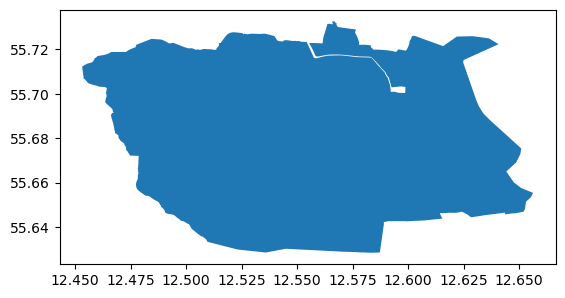

In [14]:
import requests
import geopandas as gpd

# URL of the dataset
url = "https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:miljozone&outputFormat=json&SRSNAME=EPSG:4326"

# Fetch the data
response = requests.get(url)
data = response.json()

# Load into GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(data["features"])

# Check data
print(gdf.head())

# Plot the data (optional)
gdf.plot()


In [15]:
import geopandas as gpd
import folium

# URL of the GeoJSON data
url = "https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:miljozone&outputFormat=json&SRSNAME=EPSG:4326"

# Load the data into a GeoDataFrame
gdf = gpd.read_file(url)

# Get the center of Copenhagen
center = [55.6761, 12.5683]  # Latitude, Longitude of Copenhagen

# Create a folium map centered at Copenhagen
m = folium.Map(location=center, zoom_start=12)

# Add the environmental zone (miljozone) to the map
folium.GeoJson(gdf, name="Miljozone").add_to(m)

# Display the map
m


In [16]:
import geopandas as gpd
import folium

# URL til GeoJSON-data for transitruter
url = "https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:transitrute&outputFormat=json&SRSNAME=EPSG:4326"

# Indlæs data til en GeoDataFrame
gdf = gpd.read_file(url)

# Centerpunkt for København
center = [55.6761, 12.5683]  # Latitude, Longitude

# Opret et folium-kort
m = folium.Map(location=center, zoom_start=12)

# Tilføj transitruter til kortet
folium.GeoJson(gdf, name="Transitruter", tooltip=folium.GeoJsonTooltip(fields=["vejnavn", "beskrivelse"])).add_to(m)

# Vis kortet
m


In [18]:
import geopandas as gpd
import folium

# URL til GeoJSON-data for vandinstallationer
url = "https://wfs-kbhkort.kk.dk/k101/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=k101:dp_vandinstallationer_p&outputFormat=json&SRSNAME=EPSG:4326"

# Indlæs data til en GeoDataFrame
gdf = gpd.read_file(url)

# Centerpunkt for København
center = [55.6761, 12.5683]  # Latitude, Longitude

# Opret et folium-kort
m = folium.Map(location=center, zoom_start=12)

# Tilføj vandinstallationer som markører
for _, row in gdf.iterrows():
    if row.geometry:  # Tjek om der er geometri
        if row.geometry.geom_type == 'MultiPoint':
            for point in row.geometry.geoms:  # Iterer over flere punkter i MultiPoint
                coords = point.coords[0]  # Hent koordinater for hvert punkt
                folium.Marker(
                    location=[coords[1], coords[0]],  # Latitude, Longitude
                    popup=f"{row['navn']} ({row['element']})", 
                    tooltip=row['tema'],
                    icon=folium.Icon(color="blue", icon="tint", prefix="fa")
                ).add_to(m)
        else:
            coords = row.geometry.coords[0]  # For simple Point geometry
            folium.Marker(
                location=[coords[1], coords[0]],  # Latitude, Longitude
                popup=f"{row['navn']} ({row['element']})", 
                tooltip=row['tema'],
                icon=folium.Icon(color="blue", icon="tint", prefix="fa")
            ).add_to(m)

# Vis kortet
m


/Users/claramariezachohansen/mambaforge/envs/spirii_env/lib/python3.9/site-packages/pyogrio/raw.py:198: RuntimeWarning: Several features with id = 81 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(
